##### Import required modules and functions

In [30]:
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import confusion_matrix

##### Load the MNIST digits dataset

In [31]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # separate into training and testing sets

##### Visualisation of example images

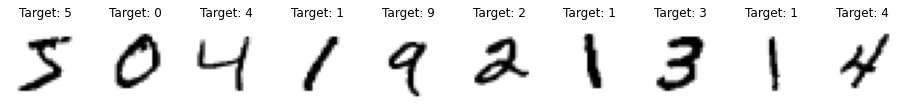

In [32]:
# visualise some representative sample images, labelled according to their target output
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16, 3))
for ax, image, label in zip(axes, x_train, y_train): # construct tuples of plot axes, image data, and target data
    ax.set_axis_off()  # remove axes of each subplot
    ax.imshow(image, cmap=mpl.cm.gray_r) # applies an inverse (_r) greyscale colour-map to each image (equivalent to 'binary' cmap)
    ax.set_title(f'Target: {label}')

##### Normalise/rescale the image array data to the interval [0,1]

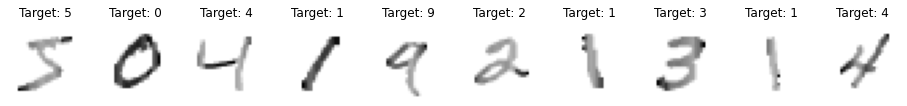

In [33]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# visualise the normalised images
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16,3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=mpl.cm.gray_r)
    ax.set_title(f'Target: {label}')

##### Construct two simple feedforward neural networks

In [54]:
net_sgd = net_adam = Sequential([
tf.keras.layers.Flatten(), # input layer flattens the 28x28 image data
Dense(112, activation=tf.nn.relu), # dense layer of 112 neurons added to network, with ReLU activation function
Dense(112, activation=tf.nn.relu),
Dense(10, activation=tf.nn.softmax), # final layer, classifier outputting softmax 'probabilities' for each of the ten digits
])

# alternative construction using add() method:
# net_sgd = net_adam = Sequential()
# net.add(tf.keras.layers.Flatten()) 
# net.add(tf.keras.layers.Dense(112, activation=tf.nn.relu))
# net.add(tf.keras.layers.Dense(112, activation=tf.nn.relu))
# net.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

##### Compile the networks using the two different optimisation algorithms

In [55]:
# want to compare the classification accuracy for two different optimisation algorithms: SGD and Adam

net_sgd.compile(
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),  # default learning rate of Adam algorithm
loss = 'sparse_categorical_crossentropy',  # cross-entropy loss function (applicable when not using 'one-hot' target encoding)
metrics = ['accuracy']  # track the classification accuracy while training
)

net_adam.compile(
optimizer = tf.keras.optimizers.Adam(  # parameter defaults: beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    ),
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy']
)

##### Train the networks

In [56]:
net_sgd.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2727 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - accuracy: 0.9646
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0785 - accuracy: 0.9755


In [57]:
net_adam.fit(x_train, y_train, epochs=3) 

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9821
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0441 - accuracy: 0.9854: 0s - l
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9886


##### Use the Adam-optimised network to make classification predictions for the test data

In [64]:
pred = net_adam.predict(x_test)  # feed the testing data through the network

xt_list = x_test.tolist()  # convert the numpy array of test images to a list
digs = [np.argmax(pred[i]) for i in range(len(pred))]  # generate a list of digit predictions for the test images

##### Classification accuracy for the test data

In [65]:
test_loss, test_acc = net_adam.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9763


##### Visualisation of example test images with network predictions

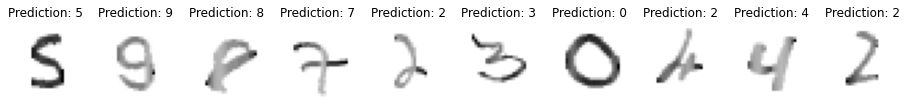

In [66]:
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16,3))
i = 240  # display the i-th image to the (i + ncols)-th image, with corresponding network predictions
for ax, image, label in zip(axes, xt_list[i:], digs[i:]):
    ax.set_axis_off()
    ax.imshow(image, cmap=mpl.cm.gray_r)
    ax.set_title(f'Prediction: {label}')

##### Visualise the network's classification accuracy

Text(78.0, 0.5, 'Predicted')

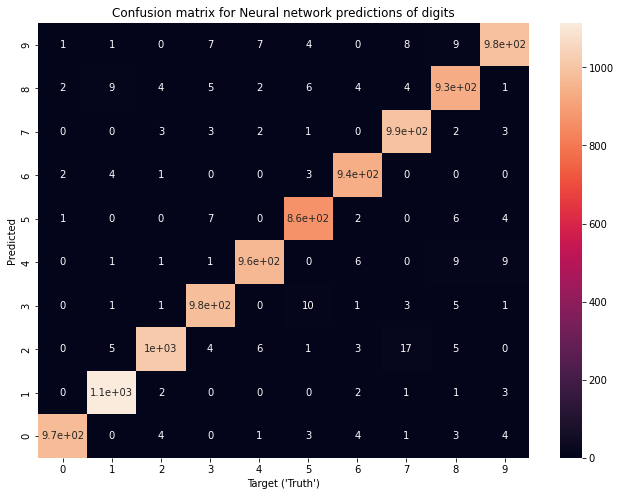

In [69]:
# generate a heatmap representation of the NN confusion matrix
mpl.figure(figsize=(11,8))
hm = sb.heatmap(np.transpose(confusion_matrix(y_test, digs) ), annot=True)
hm.invert_yaxis()
mpl.title('Confusion matrix for Neural network predictions of digits')
mpl.xlabel('Target (\'Truth\')')
mpl.ylabel('Predicted')

In [75]:
# generate a dictionary of incorrect test predictions: {key : value} = {target digit : number of misclassifications}
miss = {i : np.bincount(y_test[digs != y_test]).tolist()[i] for i in range(10) }
print(miss)
print(max(miss, key=miss.get))  # return the digit which is most frequently misclassified by the network

{0: 6, 1: 21, 2: 16, 3: 27, 4: 18, 5: 28, 6: 22, 7: 34, 8: 40, 9: 25}
8
